In [ ]:
import pandas as pd

In [ ]:
data = pd.read_csv('lithium-ion batteries.csv')

In [ ]:
data

,Materials Id,Formula,Spacegroup,Formation Energy (eV),E Above Hull (eV),Band Gap (eV),Nsites,Density (gm/cc),Volume,Has Bandstructure,Crystal System
0,mp-849394,Li2MnSiO4,Pc,-2.699,0.006,3.462,16,2.993,178.513,True,monoclinic
1,mp-783909,Li2MnSiO4,P21/c,-2.696,0.008,2.879,32,2.926,365.272,True,monoclinic
2,mp-761311,Li4MnSi2O7,Cc,-2.775,0.012,3.653,28,2.761,301.775,True,monoclinic
3,mp-761598,Li4Mn2Si3O10,C2/c,-2.783,0.013,3.015,38,2.908,436.183,True,monoclinic
4,mp-767709,Li2Mn3Si3O10,C2/c,-2.747,0.016,2.578,36,3.334,421.286,True,monoclinic
...,...,...,...,...,...,...,...,...,...,...,...
334,mp-764961,Li6Co(SiO4)2,P1,-2.545,0.071,2.685,17,2.753,171.772,True,triclinic
335,mp-849520,LiCo3(SiO4)2,P1,-2.250,0.076,0.005,42,3.318,552.402,True,triclinic
336,mp-849656,Li5Co4(Si3O10)2,P1,-2.529,0.082,0.176,35,2.940,428.648,True,triclinic
337,mp-763557,LiCoSiO4,P1,-2.348,0.087,1.333,14,2.451,214.044,True,triclinic


In [ ]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
label_encoder = LabelEncoder()
data['Spacegroup'] = label_encoder.fit_transform(data['Spacegroup'])
data['Has Bandstructure'] = data['Has Bandstructure'].astype(int)  #  True/False to 1/0
data.drop(columns=['Materials Id', 'Formula'], inplace=True, errors='ignore')


In [ ]:
X = data.drop('Crystal System', axis=1)
y = data['Crystal System']

In [ ]:
y = label_encoder.fit_transform(y)

In [ ]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X, y,test_size = 0.2, random_state = 42)

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
from tensorflow.keras.models import Sequential
model = Sequential()
from tensorflow.keras.layers import Dense
model.add(Dense(units = 64, activation = 'relu' , input_dim = X_train.shape[1]))
model.add(Dense(units = 32 , activation = 'relu'))
model.add(Dense(units =3 , activation = 'softmax'))


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:

model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - accuracy: 0.3647 - loss: 1.1118 - val_accuracy: 0.3971 - val_loss: 1.0934
Epoch 2/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4776 - loss: 1.0600 - val_accuracy: 0.4265 - val_loss: 1.0701
Epoch 3/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5634 - loss: 0.9768 - val_accuracy: 0.3529 - val_loss: 1.0665
Epoch 4/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5700 - loss: 0.9636 - val_accuracy: 0.3824 - val_loss: 1.0574
Epoch 5/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5832 - loss: 0.9168 - val_accuracy: 0.3824 - val_loss: 1.0501
Epoch 6/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5330 - loss: 0.9217 - val_accuracy: 0.3971 - val_loss: 1.0397
Epoch 7/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5672 - loss: 0.8813 - val_accuracy: 0.3971 - val_loss: 1.0342
Epoch 8/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.6025 - loss: 0.8590 - val_accuracy: 0.3971 - val_loss: 1.0285
Epoch

In [ ]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6330 - loss: 0.7054 
Test Accuracy: 61.76%


In [ ]:
y_pred_prob = model.predict(X_test)

# Since the output layer has 3 units (for 3 classes), we take the argmax to get the predicted class
y_pred = y_pred_prob.argmax(axis=1)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


In [ ]:
import numpy as np

In [ ]:

print("Predicted classes:", y_pred[:10])
print("True classes:", y_test[:10])


Predicted classes: [0 0 0 0 0 1 1 2 0 0]
True classes: [2 0 0 0 0 1 1 2 2 0]


In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred, target_names=['monoclinic', 'orthorhombic', 'triclinic']))


              precision    recall  f1-score   support

  monoclinic       0.59      0.71      0.65        31
orthorhombic       0.56      0.53      0.54        19
   triclinic       0.77      0.56      0.65        18

    accuracy                           0.62        68
   macro avg       0.64      0.60      0.61        68
weighted avg       0.63      0.62      0.62        68



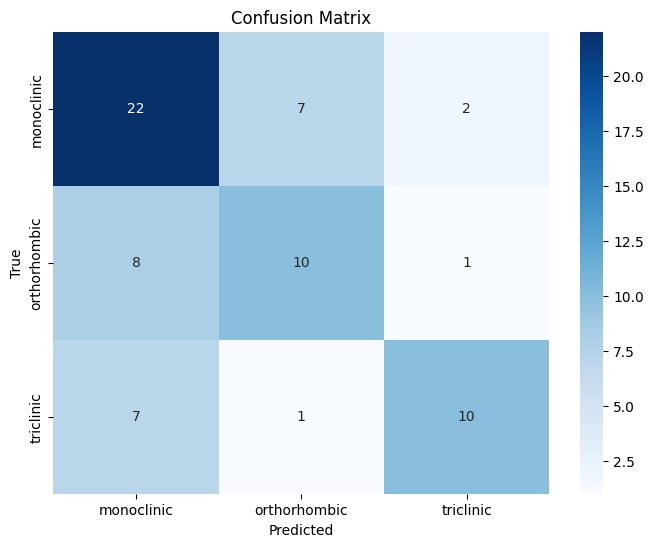

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['monoclinic', 'orthorhombic', 'triclinic'], yticklabels=['monoclinic', 'orthorhombic', 'triclinic'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()
